In [1]:
from diffusers import DiffusionPipeline
import json
import os
from time import time
import torch

/root/Frameworks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


pipe = DiffusionPipeline.from_pretrained("stablediffusionapi/realvisxl-v40-lightning", torch_dtype=torch.float16, requires_grad=False)



text_encoder/model.safetensors not found
Keyword arguments {'requires_grad': False} are not expected by StableDiffusionXLPipeline and will be ignored.
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stablediffusionapi--realvisxl-v40-lightning/snapshots/97d699fb547af64998dc605072ebb4d89db3e8df/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stablediffusionapi--realvisxl-v40-lightning/snapshots/97d699fb547af64998dc605072ebb4d89db3e8df/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading pipeline components...:  57%|█████▋    | 4/7 [00:03<00:02,  1.49it/s]An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stablediffusionapi--realvisxl-v40-lightning/snapshots/97d699fb547af64998dc605072ebb4d89db3e8df/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stablediffusionapi--realvisxl-v40-lightning/snapshots/97d699fb547af64998dc605072ebb4d89db3e8df/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


In [3]:
pipe
pipe.to("cuda")

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "stablediffusionapi/realvisxl-v40-lightning",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
with open('../prompts.json', 'r') as f:
    prompts = json.load(f)
from pprint import pprint
pprint(prompts)

output_dir = "../output/diffusers_test"
os.makedirs(output_dir, exist_ok=True)

{'0': 'gerate a high resolution image for the car booking website banner '
      'generate animated pictures with a map, high quality, detailed',
 '1': 'Ashoka Tea & Food Corner Street Food, North Indian, Beverages Greater '
      'Kailash 1 (GK1), New Delhi, high quality, detailed',
 '2': 'gerate a high resolution image for the car booking website banner, high '
      'quality, detailed',
 '3': 'a church with a clock tower in the background, x - day, full details, '
      'with street food stalls, invitation card, vxf movie, food stall, by '
      'Thota Vaikuntham, inspired by Thota Vaikuntham, detailed information, '
      'community celebration, front mission, food focus, iso1200, iso 1 2 0 0, '
      'high quality, detailed',
 '4': 'Patient information leaflet for atorvastatin drug, high quality, '
      'detailed',
 '5': 'a man sitting in front of a drum set, playing drums, drummer, philip '
      'selway (drums), drum pads, drum set, drumkit, drums, drum kit, drum & '
      'bas

In [5]:
image = pipe(prompts["0"],
            num_images_per_prompt = 4,
            width=816,
            height=1024,
            ).images

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:20<00:00,  2.44it/s]


4


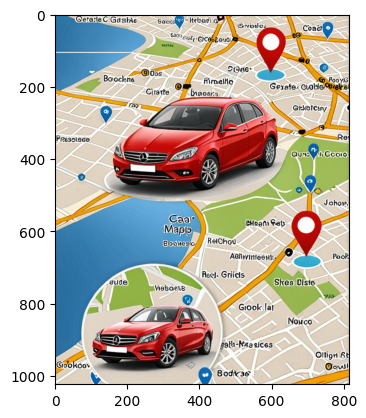

In [6]:
import matplotlib.pyplot as plt
import numpy as np
print(len(image))
plt.imshow(np.squeeze(image[0]))


In [ ]:
for prompt_index in range(len(prompts)):
    torch.cuda.empty_cache()
    prompt= prompts[f"{prompt_index}"]
    
    # Create a directory for each prompt
    prompt_dir = os.path.join(output_dir, f"prompt_{prompt_index}")
    os.makedirs(prompt_dir, exist_ok=True)
    
    # Generate 4 images at once for the current prompt
    print(prompt)
    st_time = time()
    with torch.no_grad():
        images = pipe(prompt, num_images_per_prompt=4).images  # Generate 4 images at once
    print('For prompt {i} time taken is:', time()-st_time)
    # Save each generated image
    for j, image in enumerate(images):
        image_path = os.path.join(prompt_dir, f"img_{j}.png")
        image.save(image_path)
        print(f"Saved image: {image_path}")

gerate a high resolution image for the car booking website banner generate animated pictures with a map, high quality, detailed


  2%|▏         | 1/50 [00:00<00:12,  3.85it/s]

100%|██████████| 50/50 [00:27<00:00,  1.84it/s]


For prompt {i} time taken is: 29.022244453430176
Saved image: ../output/diffusers_test/prompt_0/img_0.png
Saved image: ../output/diffusers_test/prompt_0/img_1.png
Saved image: ../output/diffusers_test/prompt_0/img_2.png
Saved image: ../output/diffusers_test/prompt_0/img_3.png
Ashoka Tea & Food Corner Street Food, North Indian, Beverages Greater Kailash 1 (GK1), New Delhi, high quality, detailed


100%|██████████| 50/50 [00:27<00:00,  1.82it/s]


For prompt {i} time taken is: 29.33575415611267
Saved image: ../output/diffusers_test/prompt_1/img_0.png
Saved image: ../output/diffusers_test/prompt_1/img_1.png
Saved image: ../output/diffusers_test/prompt_1/img_2.png
Saved image: ../output/diffusers_test/prompt_1/img_3.png
gerate a high resolution image for the car booking website banner, high quality, detailed


100%|██████████| 50/50 [00:27<00:00,  1.82it/s]


For prompt {i} time taken is: 29.40867805480957
Saved image: ../output/diffusers_test/prompt_2/img_0.png
Saved image: ../output/diffusers_test/prompt_2/img_1.png
Saved image: ../output/diffusers_test/prompt_2/img_2.png
Saved image: ../output/diffusers_test/prompt_2/img_3.png
a church with a clock tower in the background, x - day, full details, with street food stalls, invitation card, vxf movie, food stall, by Thota Vaikuntham, inspired by Thota Vaikuntham, detailed information, community celebration, front mission, food focus, iso1200, iso 1 2 0 0, high quality, detailed


100%|██████████| 50/50 [00:27<00:00,  1.81it/s]


For prompt {i} time taken is: 29.5700364112854
Saved image: ../output/diffusers_test/prompt_3/img_0.png
Saved image: ../output/diffusers_test/prompt_3/img_1.png
Saved image: ../output/diffusers_test/prompt_3/img_2.png
Saved image: ../output/diffusers_test/prompt_3/img_3.png
Patient information leaflet for atorvastatin drug, high quality, detailed


 64%|██████▍   | 32/50 [00:17<00:10,  1.79it/s]